In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r"C:\Users\yitin\Desktop\attention\market_svi_edgar.csv")
df_com =  pd.read_csv(r"C:\Users\yitin\Desktop\attention\investor-attention-returns-patern\data\companies_after_2005.csv")
df.head()

Unnamed: 0 symbol        date  svi  svi.1  edgar  price       volume
0           0   MSFT  2005-01-02   18  31338    145  26.67  398924026.0
1           1   MSFT  2005-01-09   19  33079   3220  26.12  379712121.0
2           2   MSFT  2005-01-16   12  20892   3030  25.65  266617523.0
3           3   MSFT  2005-01-23   20  34820   3539  26.18  409844550.0
4           4   MSFT  2005-01-30   15  26115   4112  26.32  347830186.0

In [4]:
df_com.head()

Unnamed: 0  Rank               Name Symbol      marketcap  price (USD)  \
0           0     1          Microsoft   MSFT  3002343620608       404.06   
1           1     2              Apple   AAPL  2815212650496       182.31   
2           2     4             NVIDIA   NVDA  1793541144576       726.13   
3           3     5             Amazon   AMZN  1760768032768       169.51   
4           4     6  Alphabet (Google)   GOOG  1753911394304       141.76   

         country  IPO_year capitalization  
0  United States      1986           high  
1  United States      1980           high  
2  United States      1999           high  
3  United States      1997           high  
4  United States      2004           high

In [5]:
merged_df = pd.merge(df, df_com[['Symbol', 'capitalization']], left_on='symbol', right_on='Symbol', how='left')

merged_df.drop(columns=['Symbol'], inplace=True)

merged_df['weekly_return'] = (merged_df['price'] - merged_df.groupby('symbol')['price'].shift(1)) / merged_df.groupby('symbol')['price'].shift(1)
merged_df.head()

Unnamed: 0 symbol        date  svi  svi.1  edgar  price       volume  \
0           0   MSFT  2005-01-02   18  31338    145  26.67  398924026.0   
1           1   MSFT  2005-01-09   19  33079   3220  26.12  379712121.0   
2           2   MSFT  2005-01-16   12  20892   3030  25.65  266617523.0   
3           3   MSFT  2005-01-23   20  34820   3539  26.18  409844550.0   
4           4   MSFT  2005-01-30   15  26115   4112  26.32  347830186.0   

  capitalization  weekly_return  
0           high            NaN  
1           high      -0.020622  
2           high      -0.017994  
3           high       0.020663  
4           high       0.005348

In [6]:
low = merged_df['capitalization'] == 'low'
low_cap = merged_df[low]['symbol'].unique()
low_cap

array(['DNN', 'VEON', 'VRTS', 'LKFN', 'CPRX', 'TRMK', 'NBTB', 'CXW',
       'POM.PA', 'BB', 'THRM', 'LZB', 'NSSC', 'SPNS', 'DVAX', 'EIF.TO',
       'TTMI', 'TDS', 'CBRL', 'TARO', 'NTCT', 'CSGS', 'EXTR', 'MRTN',
       'OXM', 'FRU.TO', 'BANR', 'HLX', 'JACK', 'AMWD', 'GPRE', 'UFPT',
       'LIF.TO', 'FBNC', 'FNLC', 'GTY', 'FWRG', 'HWKN', 'HTLF', 'IMKTA',
       'CFP.TO', 'ENGH.TO', 'CTS', 'SYBT', 'FCF', 'LNN', 'LTC', 'CAL',
       'KFRC', 'GES', 'NWN', 'PDFS', 'WG.L', 'ANZFF', 'AG', 'OMCL',
       'LGND', 'BUSE', 'SMTC', 'DBD', 'SPH', 'CMCO', 'WABC', 'MDA.TO',
       'RPT', 'TGI', 'AIV', 'INE.TO', 'MFA', 'NX', 'CGAU', 'PRAA', 'GERN',
       'PERI', 'BHE', 'MGNX', 'GIII'], dtype=object)

In [14]:
high = merged_df['capitalization'] == 'high'
high_cap = merged_df[high]['symbol'].unique()
high_cap

array(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'BRK-B', 'LLY', 'TSM',
       'NVO', 'JPM', 'UNH', 'WMT', 'XOM', 'JNJ', 'PG', 'ASML', 'HD',
       'TCEHY', 'MRK', 'COST', 'TM', 'ORCL', 'CVX', 'AMD', 'CRM', 'BAC',
       'KO', 'NFLX', 'TMO', 'MCD', 'SAP', 'DIS', '601857.SS', 'AZN',
       'ABT', 'CSCO', 'TMUS', 'WFC', 'DHR', 'INTC', 'INTU', 'IBM', 'QCOM',
       'VZ', 'AMAT', 'CMCSA', 'CAT', 'NKE', 'PFE', 'AXP', 'AMGN', 'UNP',
       'TXN', 'SIE.DE', 'MS', 'RY', 'HDB', 'ISRG', 'SPGI', 'SYK', 'IDEXY',
       'LOW', 'COP', 'HON', 'BKNG', 'UL', 'UPS', 'PLD', 'AIR.PA', 'GS',
       'BA', 'BUD', 'LRCX', 'T', 'RTX', 'DTE.DE', 'BLK', 'SCHW', 'NEE',
       'SNY', 'PBR', 'MDT', 'RIO', 'TJX', 'PGR', 'SONY', 'VRTX', 'TD',
       'SBUX', 'C', 'ALV.DE', 'REGN', 'ADP', 'LMT', 'DE', 'BMY', 'BP',
       'CI', 'MMC', 'CVS', 'MDLZ', 'BSX', 'EL.PA', 'CSL.AX', 'KLAC',
       'GILD', 'FI', 'MU', 'AMT', 'IBN', '9983.T', 'GSK', 'INFY', 'SNPS',
       '8058.T', 'CNI', '0883.HK', 'HCA', 'DEO', '9984.T', 'WM', 'R

In [20]:
def plot_compare(company, year, start, end):
    df_company = merged_df[(merged_df['symbol'] == company) & (merged_df['date'].str.contains(year)) & (merged_df['date'] >= start) & (merged_df['date'] <= end)]
    
    data_to_plot = df_company[['svi', 'edgar', 'weekly_return']]

    # Normalize the data using Z score
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_to_plot)

    # Create a new DataFrame containing the normalized data
    normalized_df = pd.DataFrame(normalized_data, columns=data_to_plot.columns)

    # Plot the lines
    plt.figure(figsize=(12, 6), dpi = 480)
    plt.plot(normalized_df.index, normalized_df['svi'], label='SVI')
    plt.plot(normalized_df.index, normalized_df['edgar'], label='EDGAR')
    plt.plot(normalized_df.index, normalized_df['weekly_return'], label='Weekly Return')
    plt.xlabel('Week')
    plt.ylabel('Normalized Value')
    plt.title(f'Comparison of SVI, EDGAR, and Weekly Return for {company} during {start} and {end}')
    plt.legend()
    plt.show()

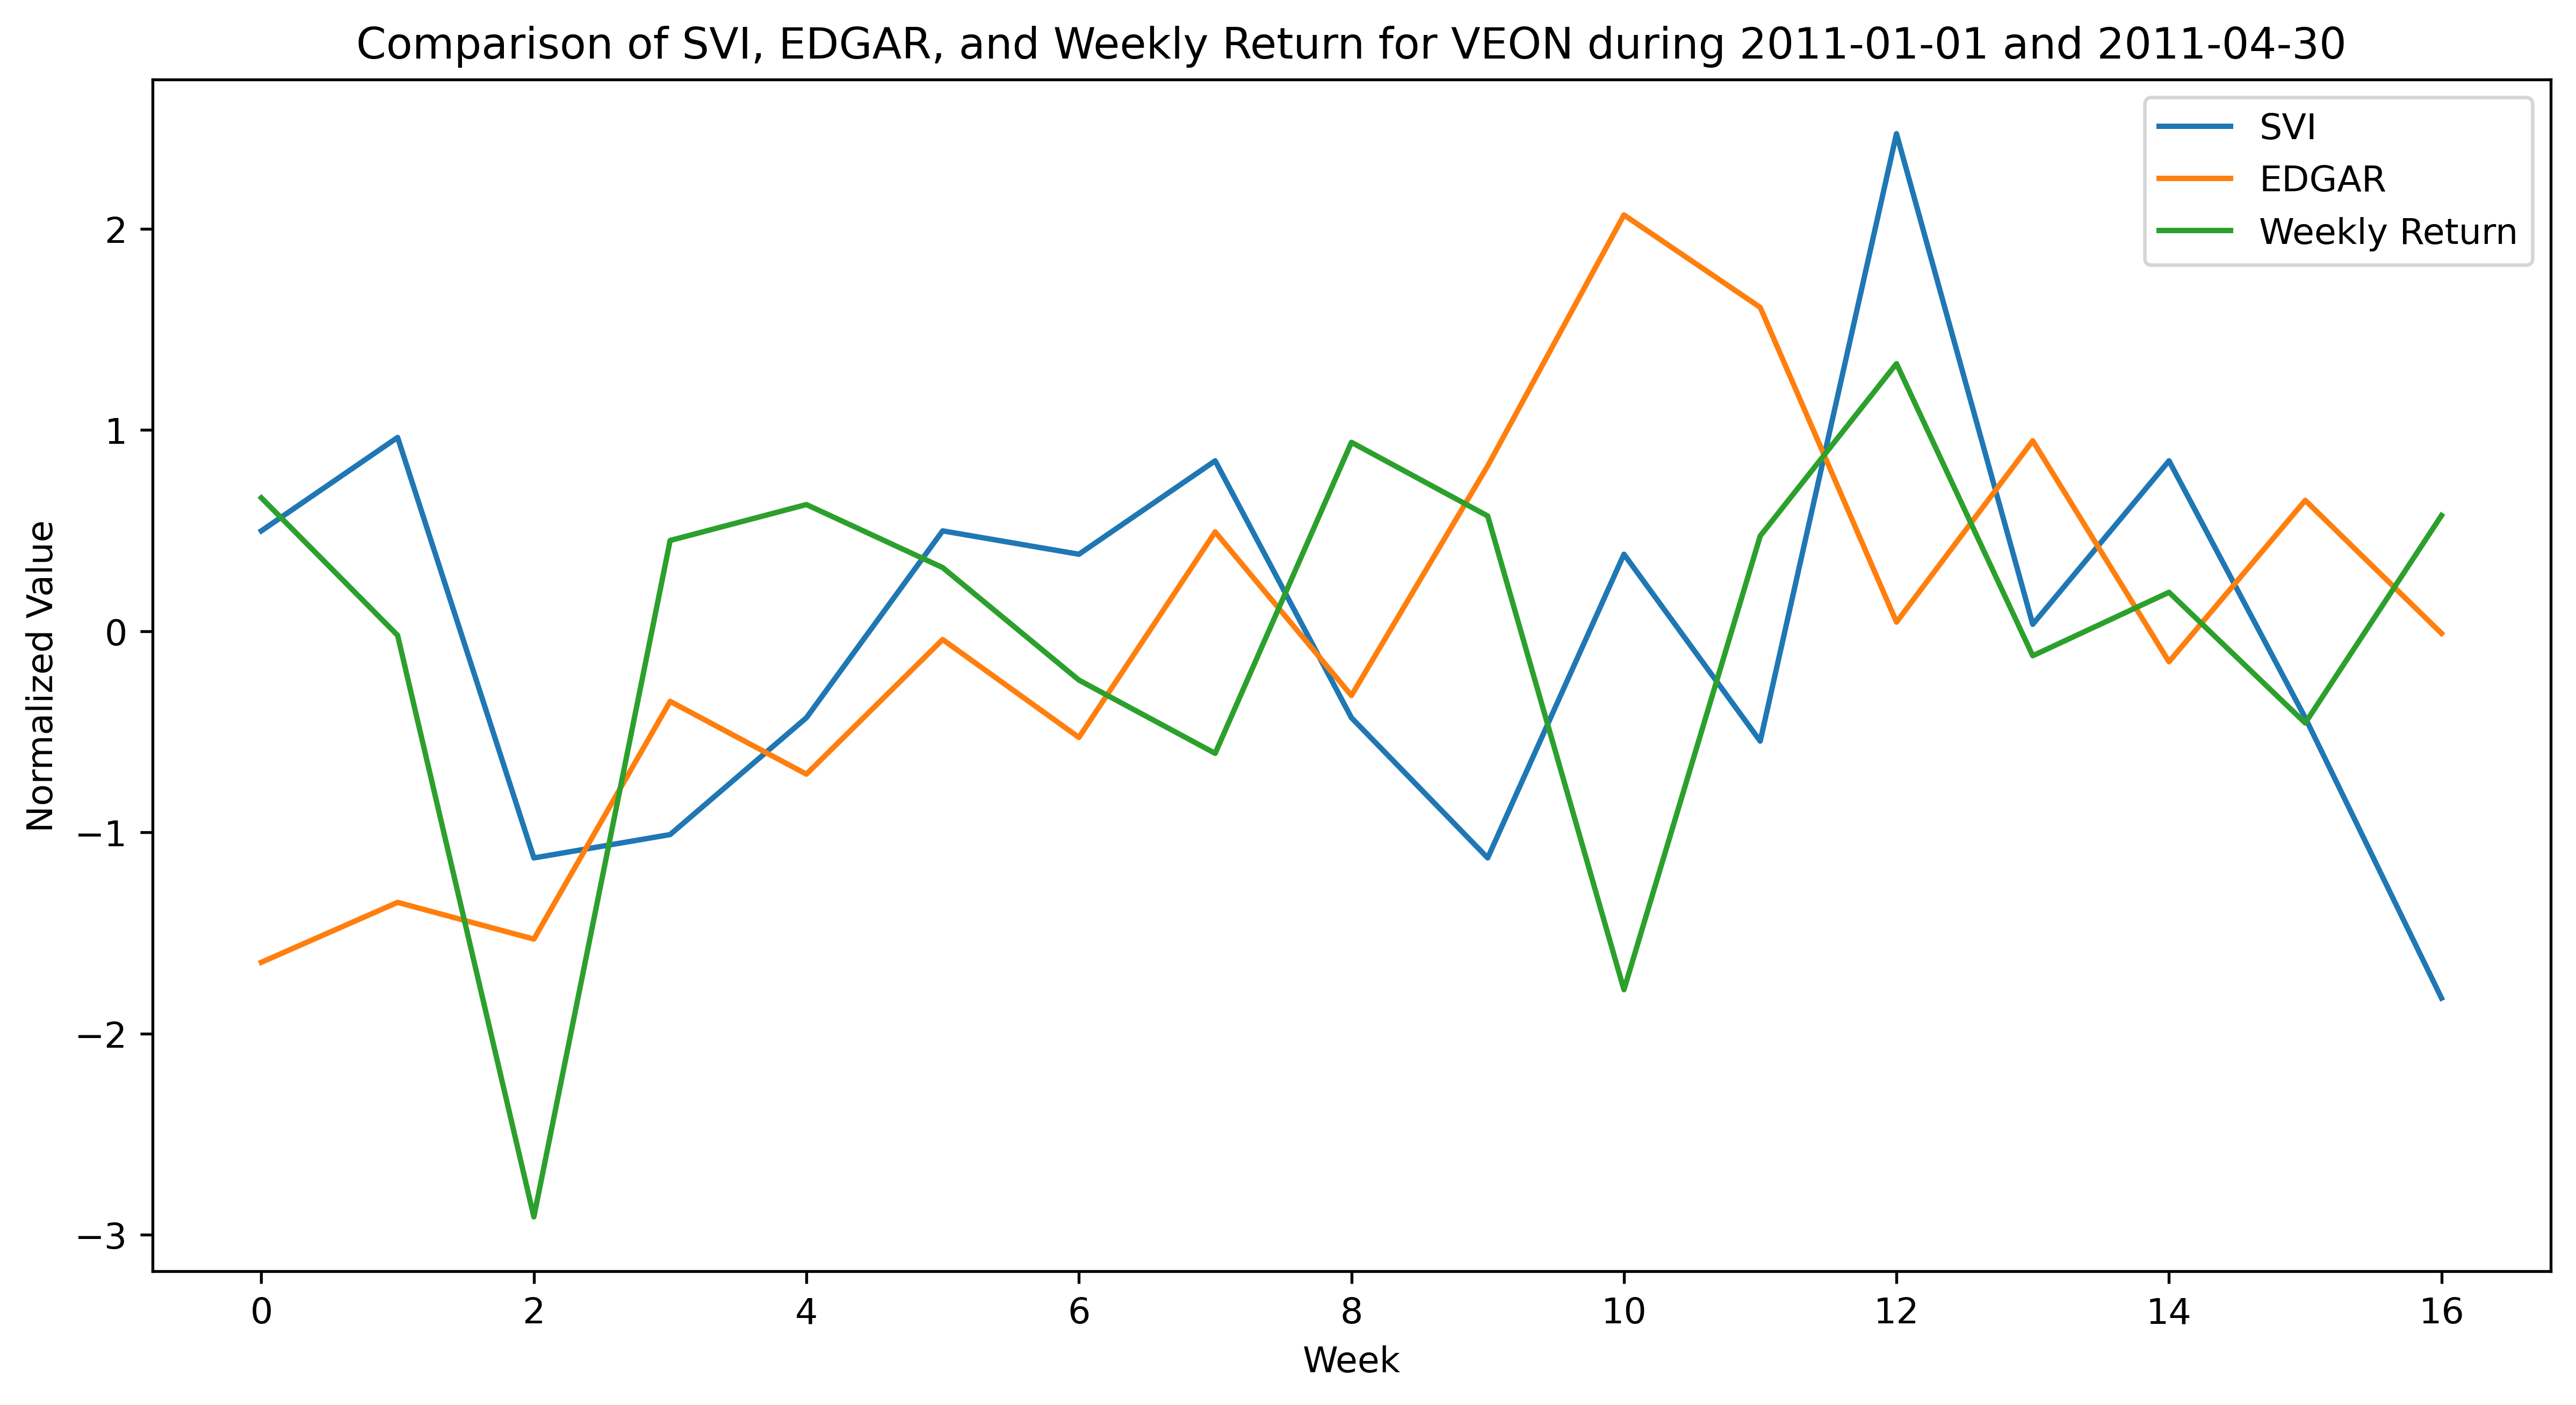

In [21]:
plot_compare('VEON', '2011', '2011-01-01', '2011-04-30')

High Capital companies comparision

1. IT

Microsoft

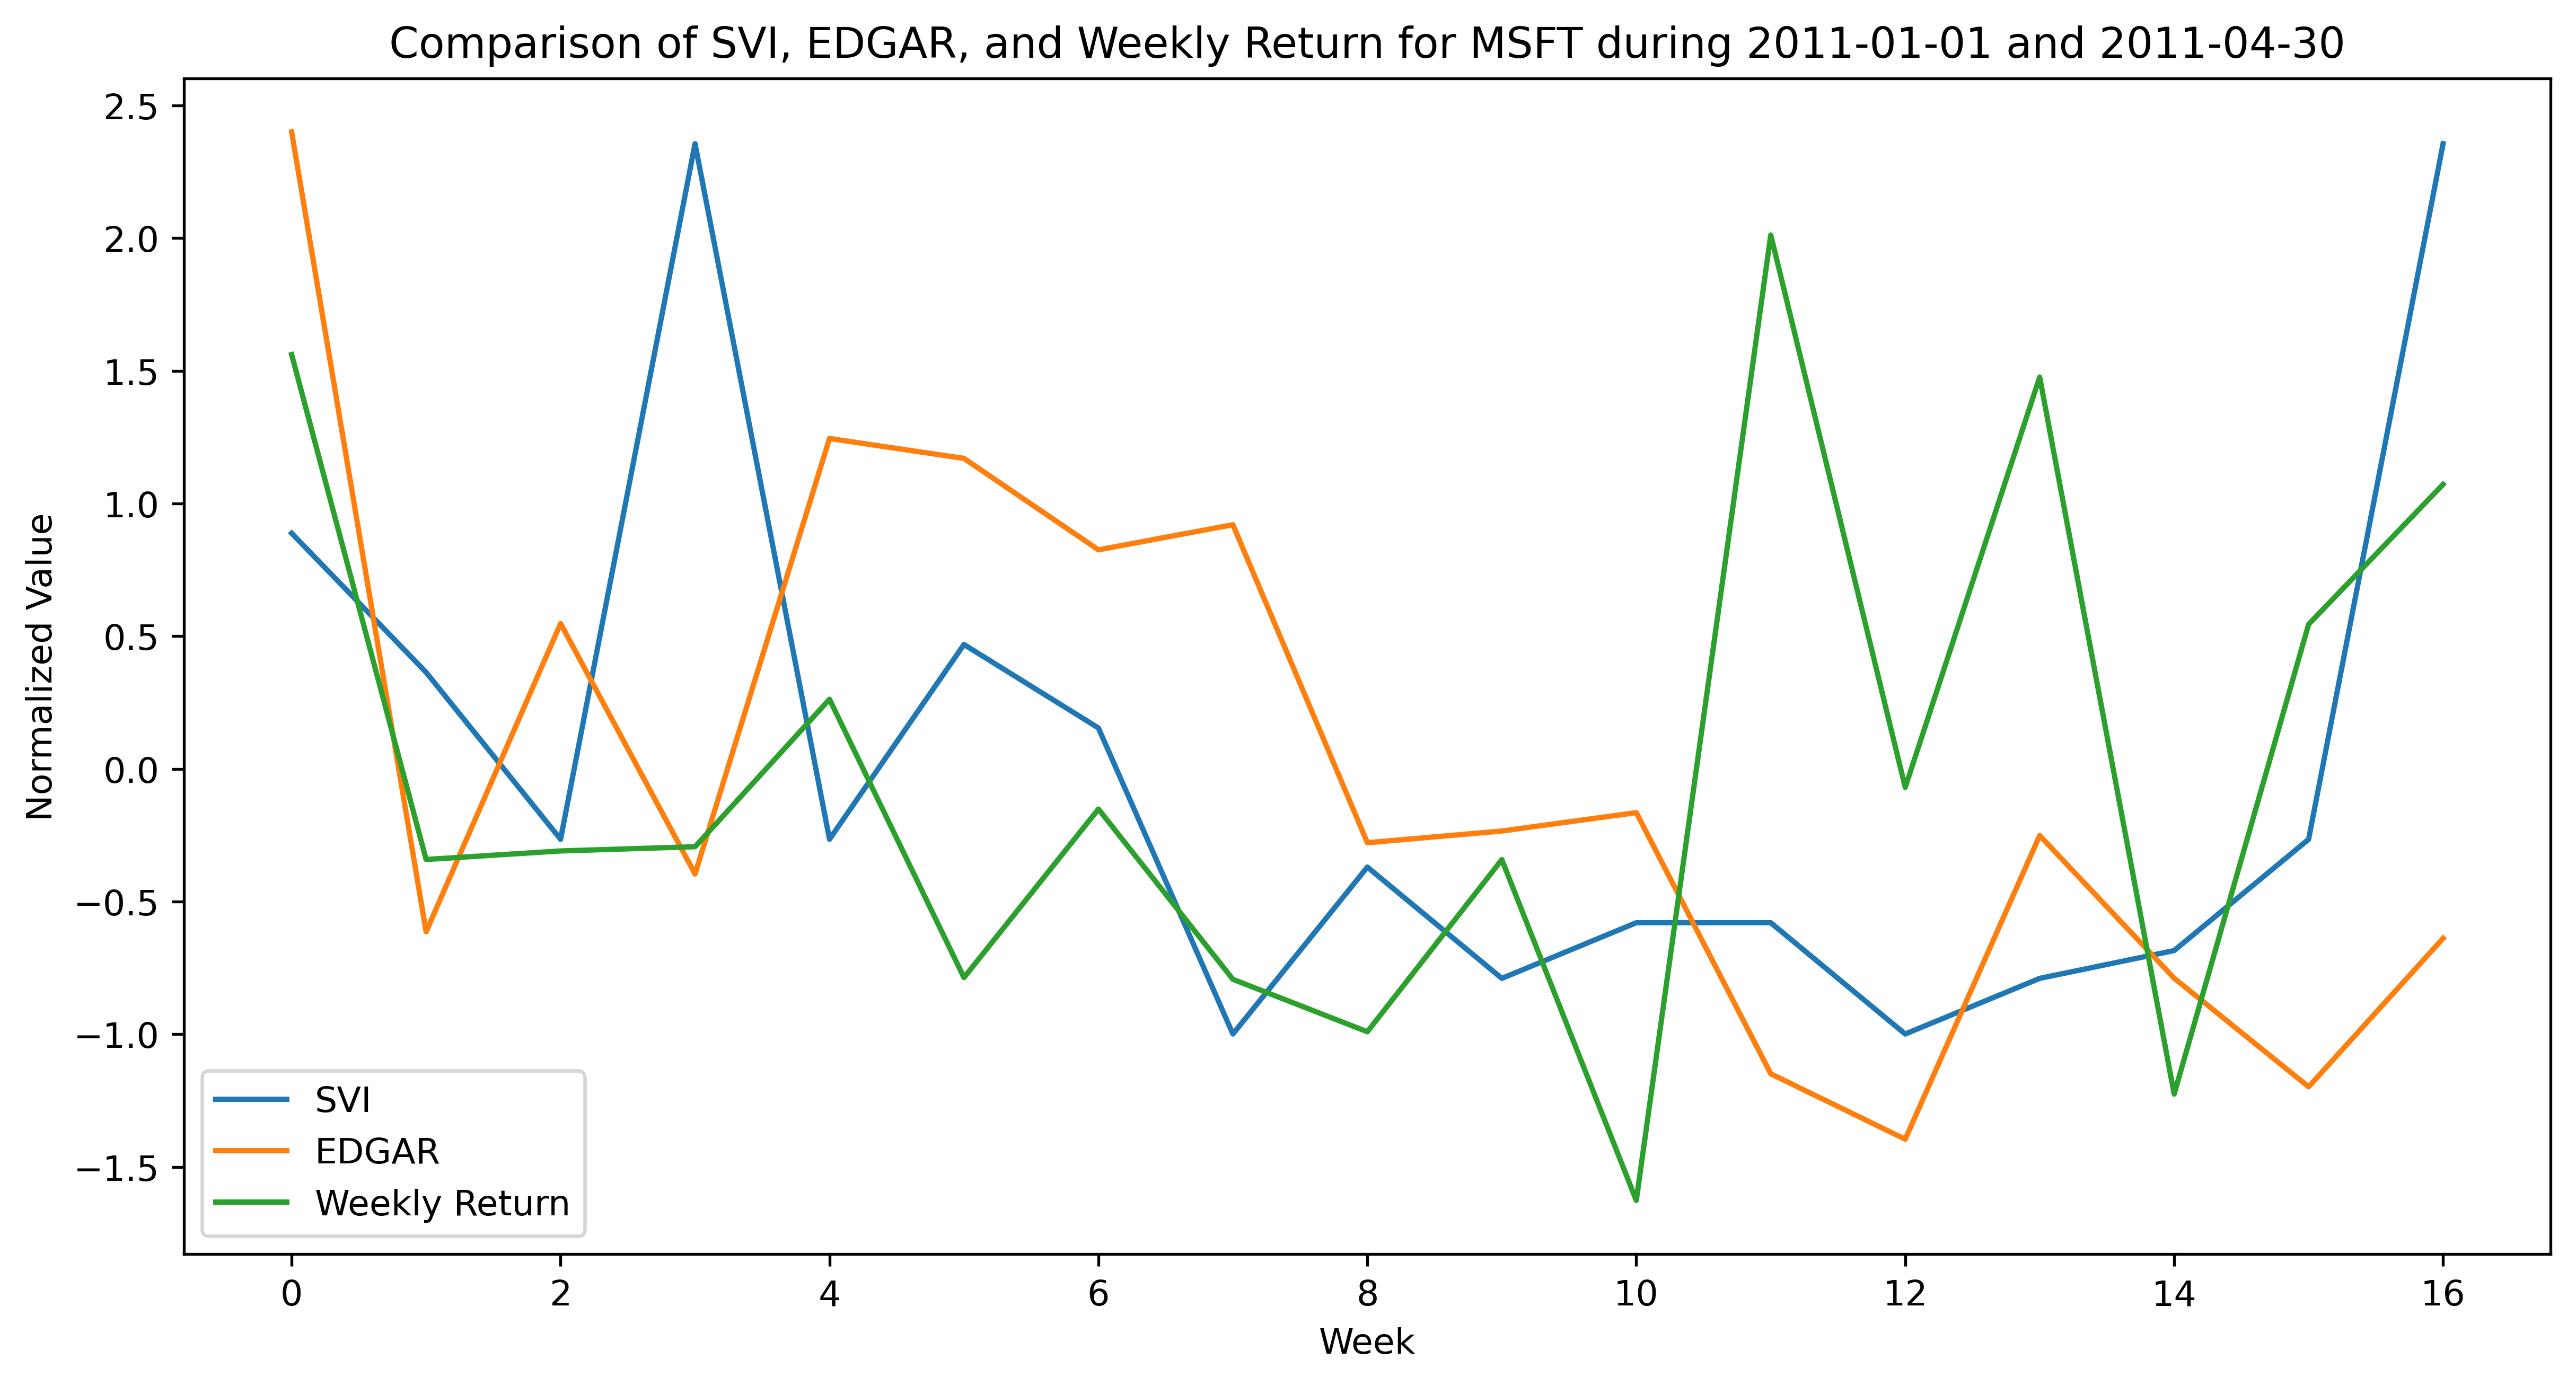

In [22]:
plot_compare('MSFT', '2011', '2011-01-01', '2011-04-30')

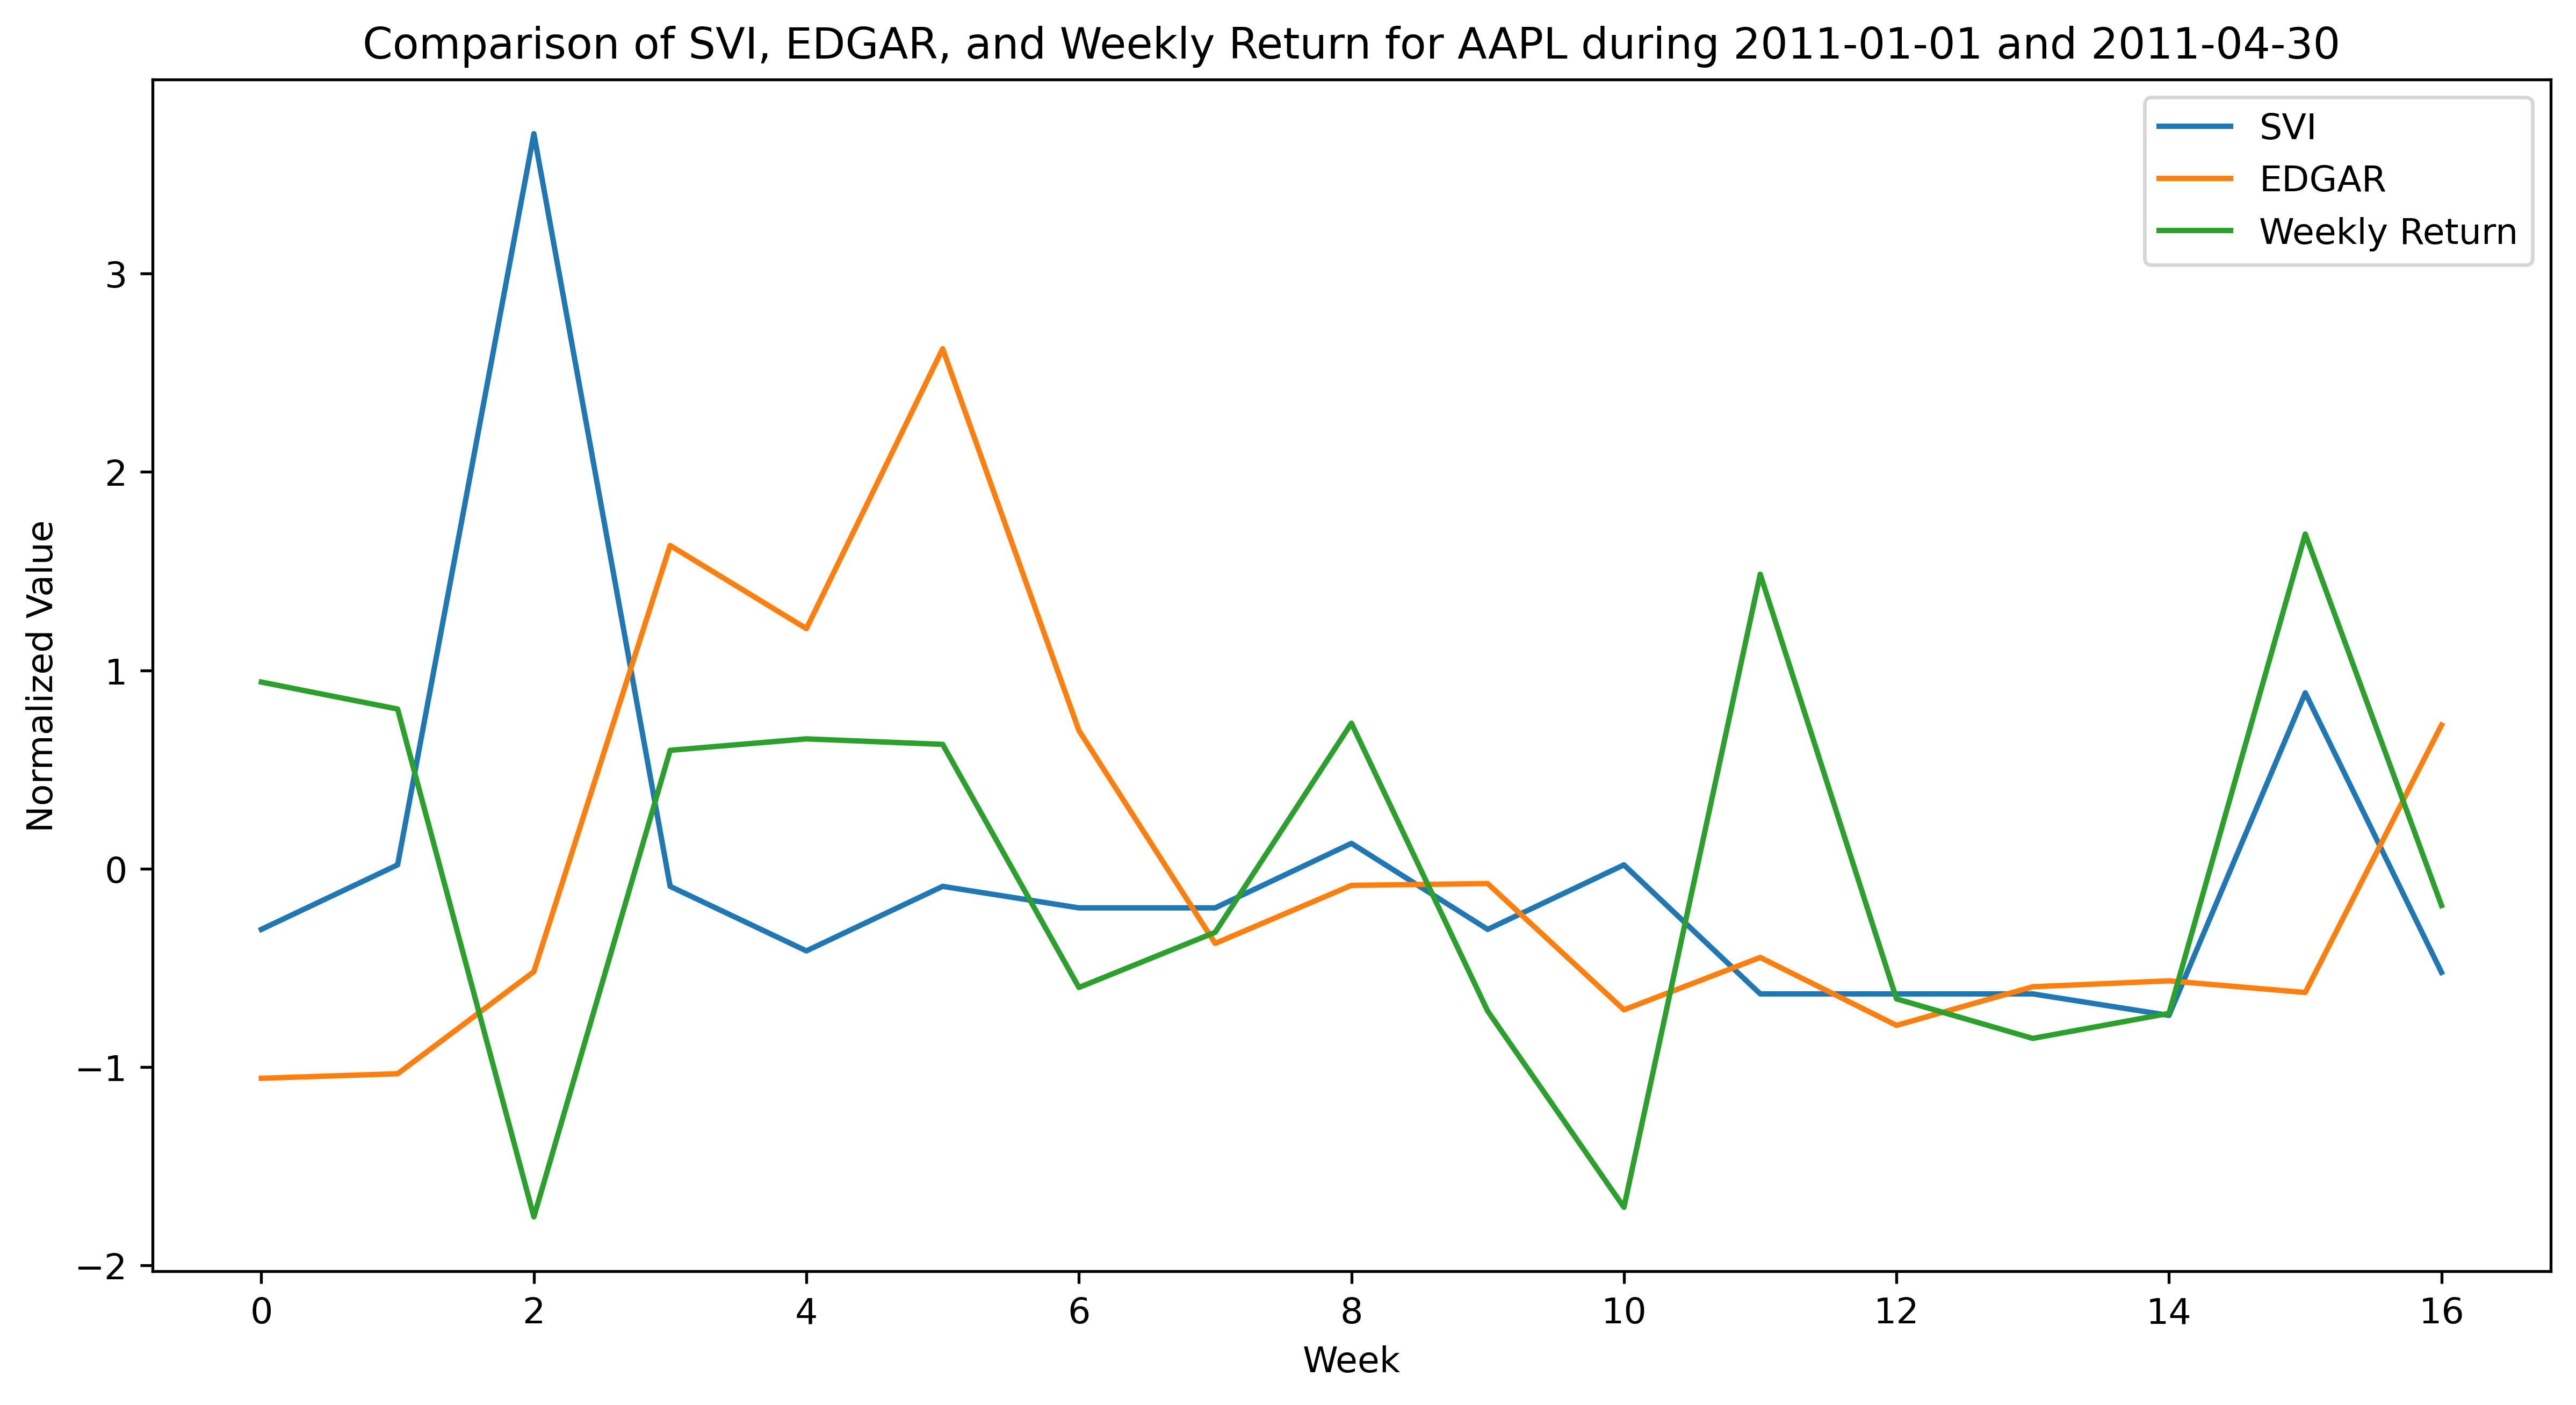

In [35]:
plot_compare('AAPL', '2011', '2011-01-01', '2011-04-30')

2. Finance

J.P. Morgan

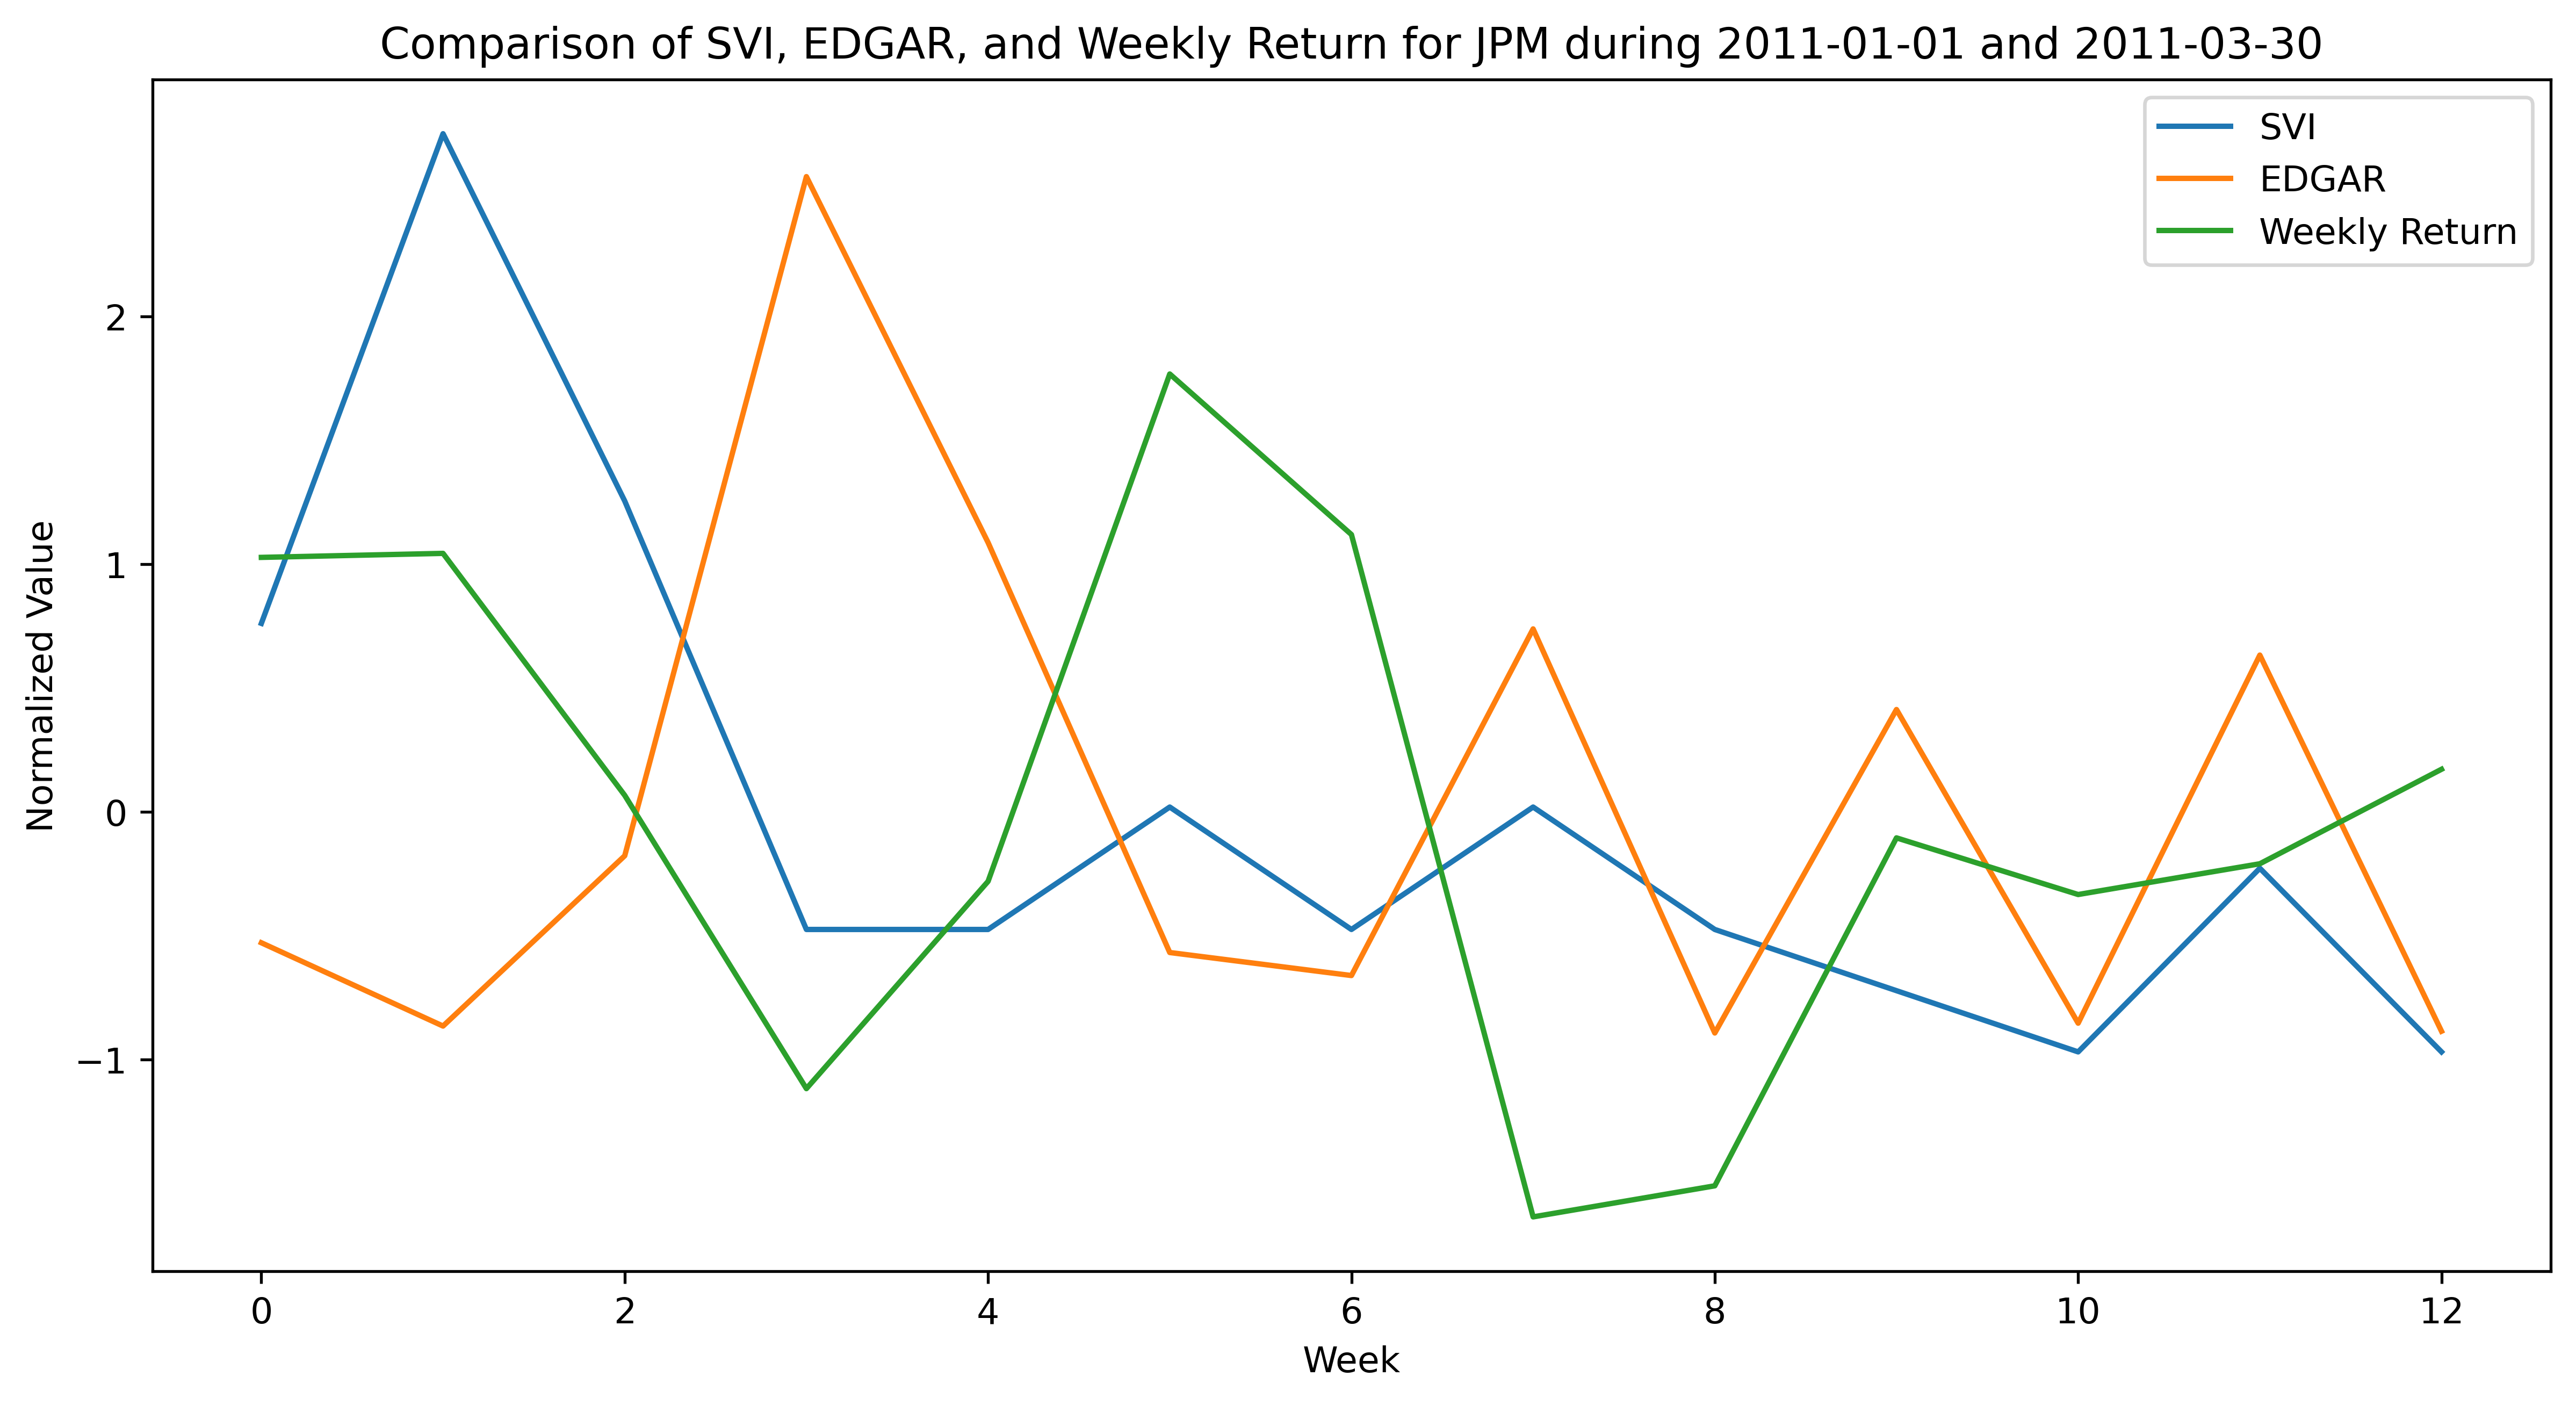

In [26]:
plot_compare('JPM', '2011', '2011-01-01', '2011-03-30')

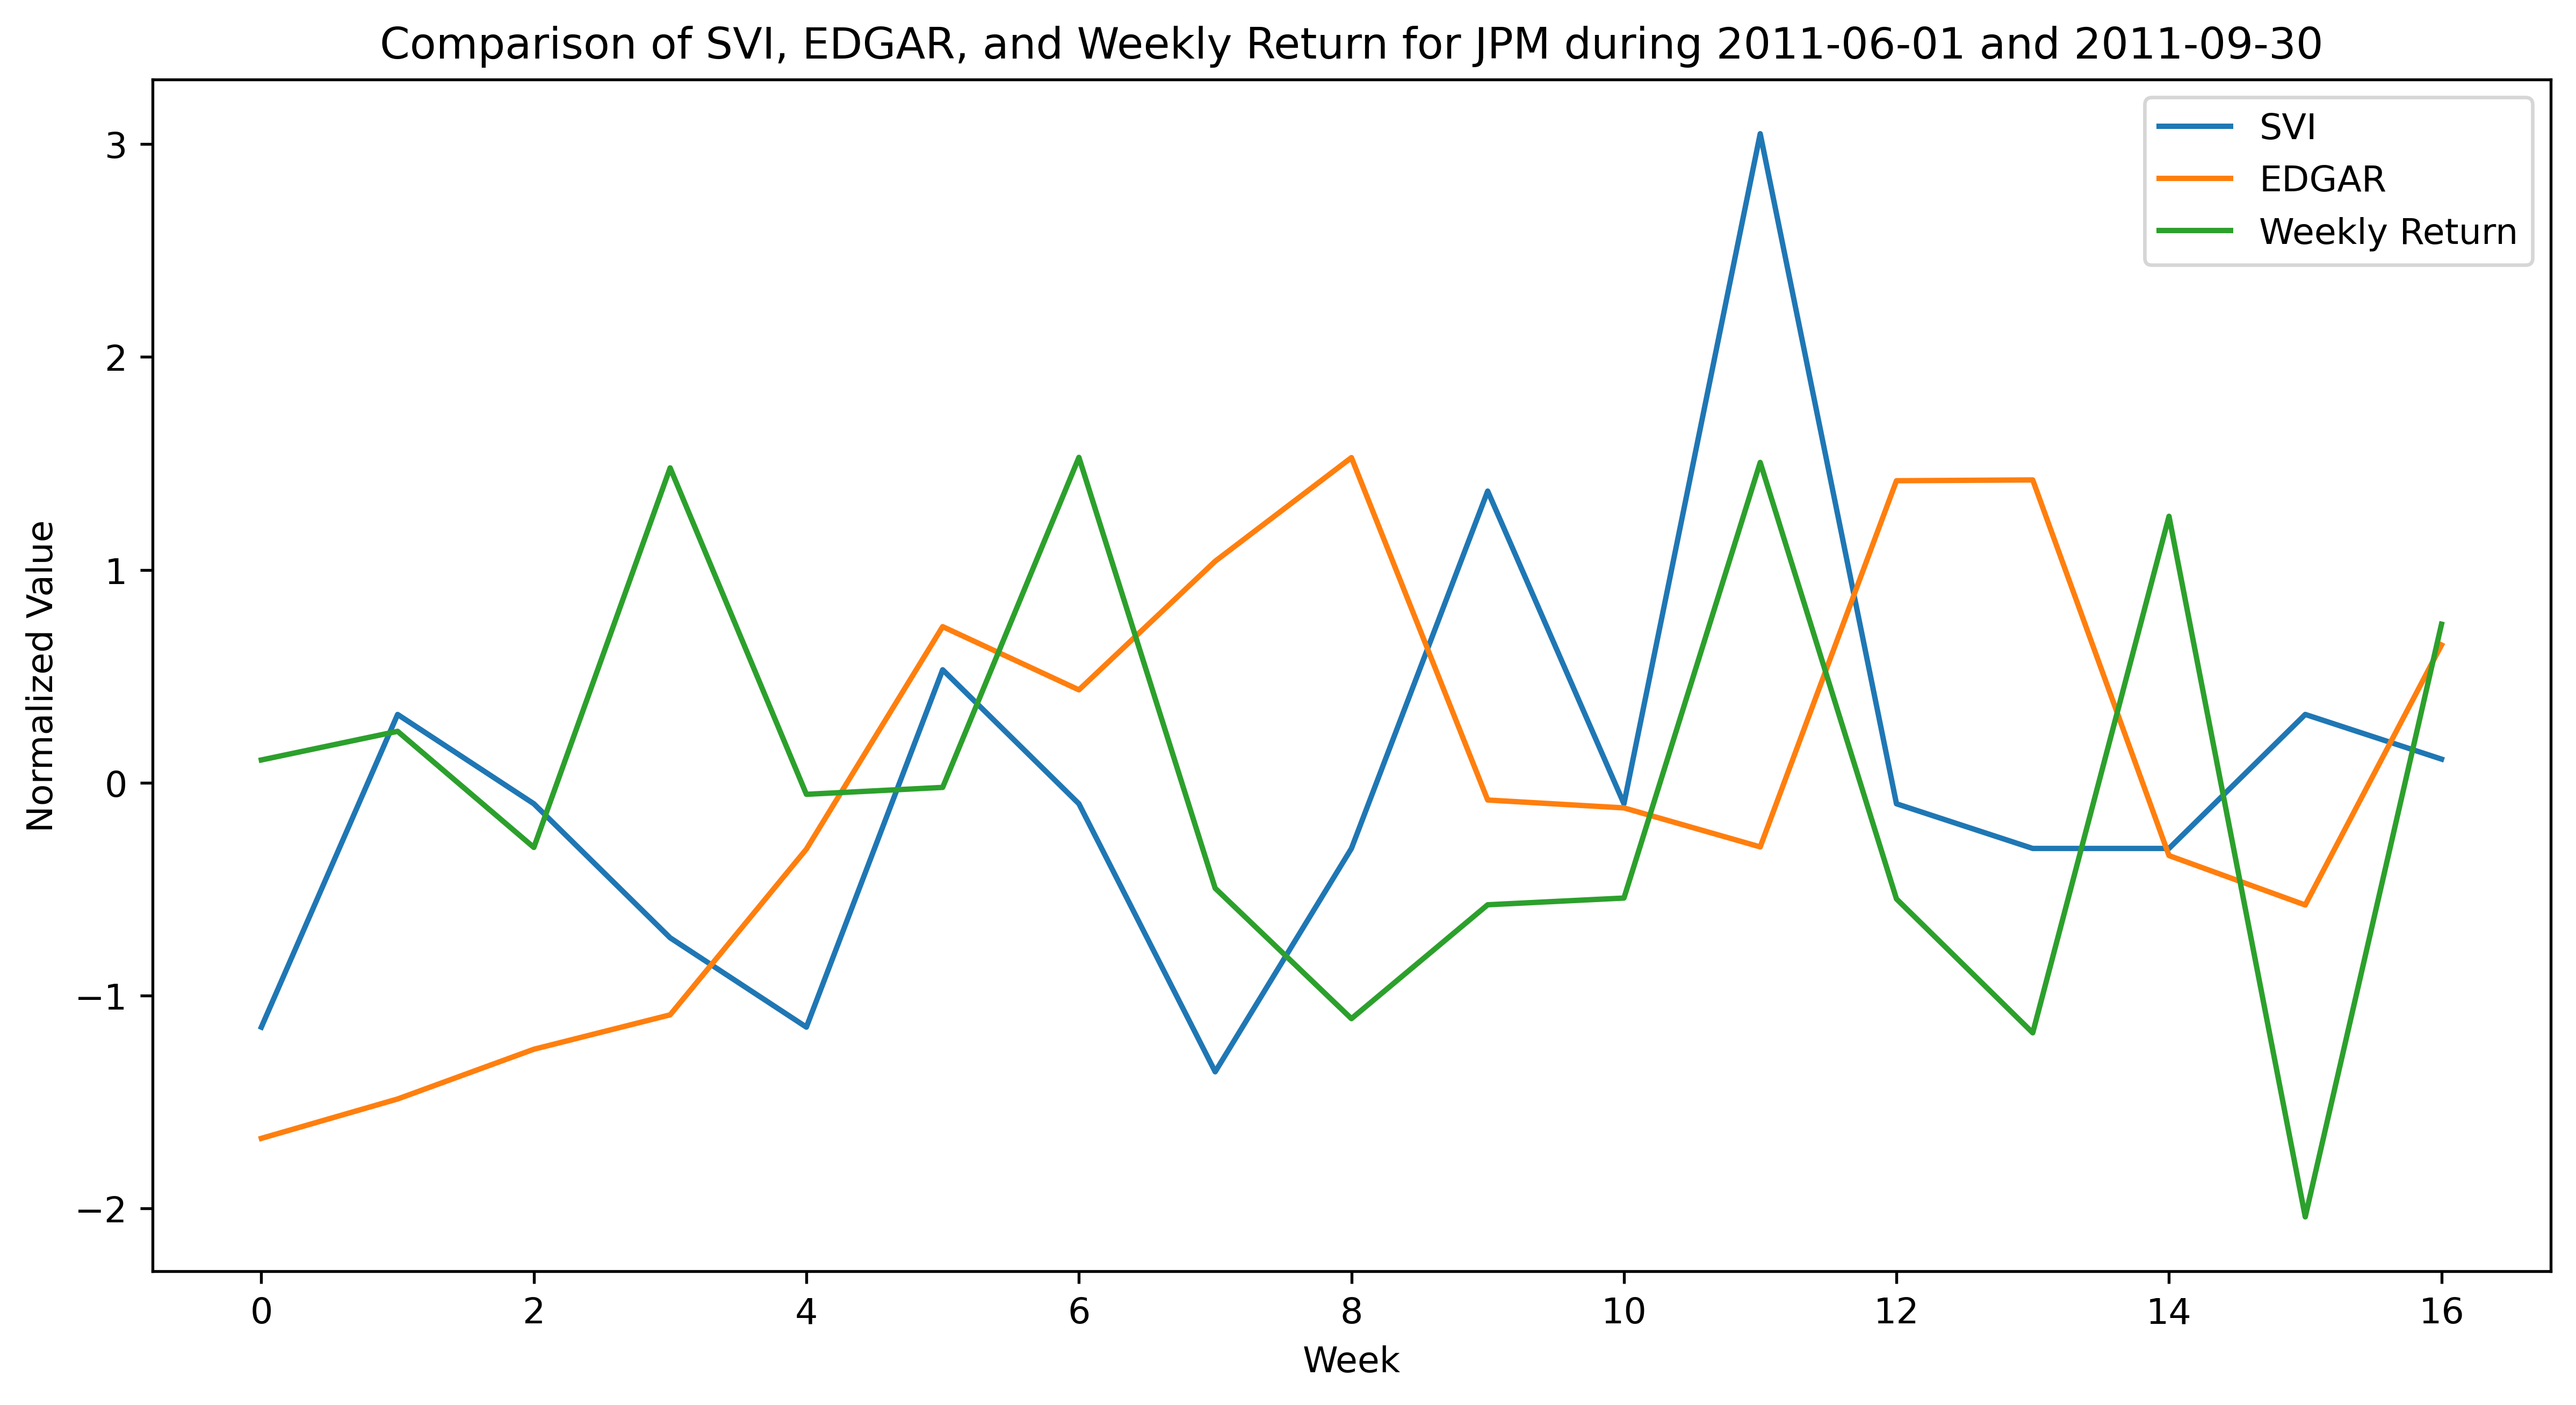

In [25]:
plot_compare('JPM', '2011', '2011-06-01', '2011-09-30')

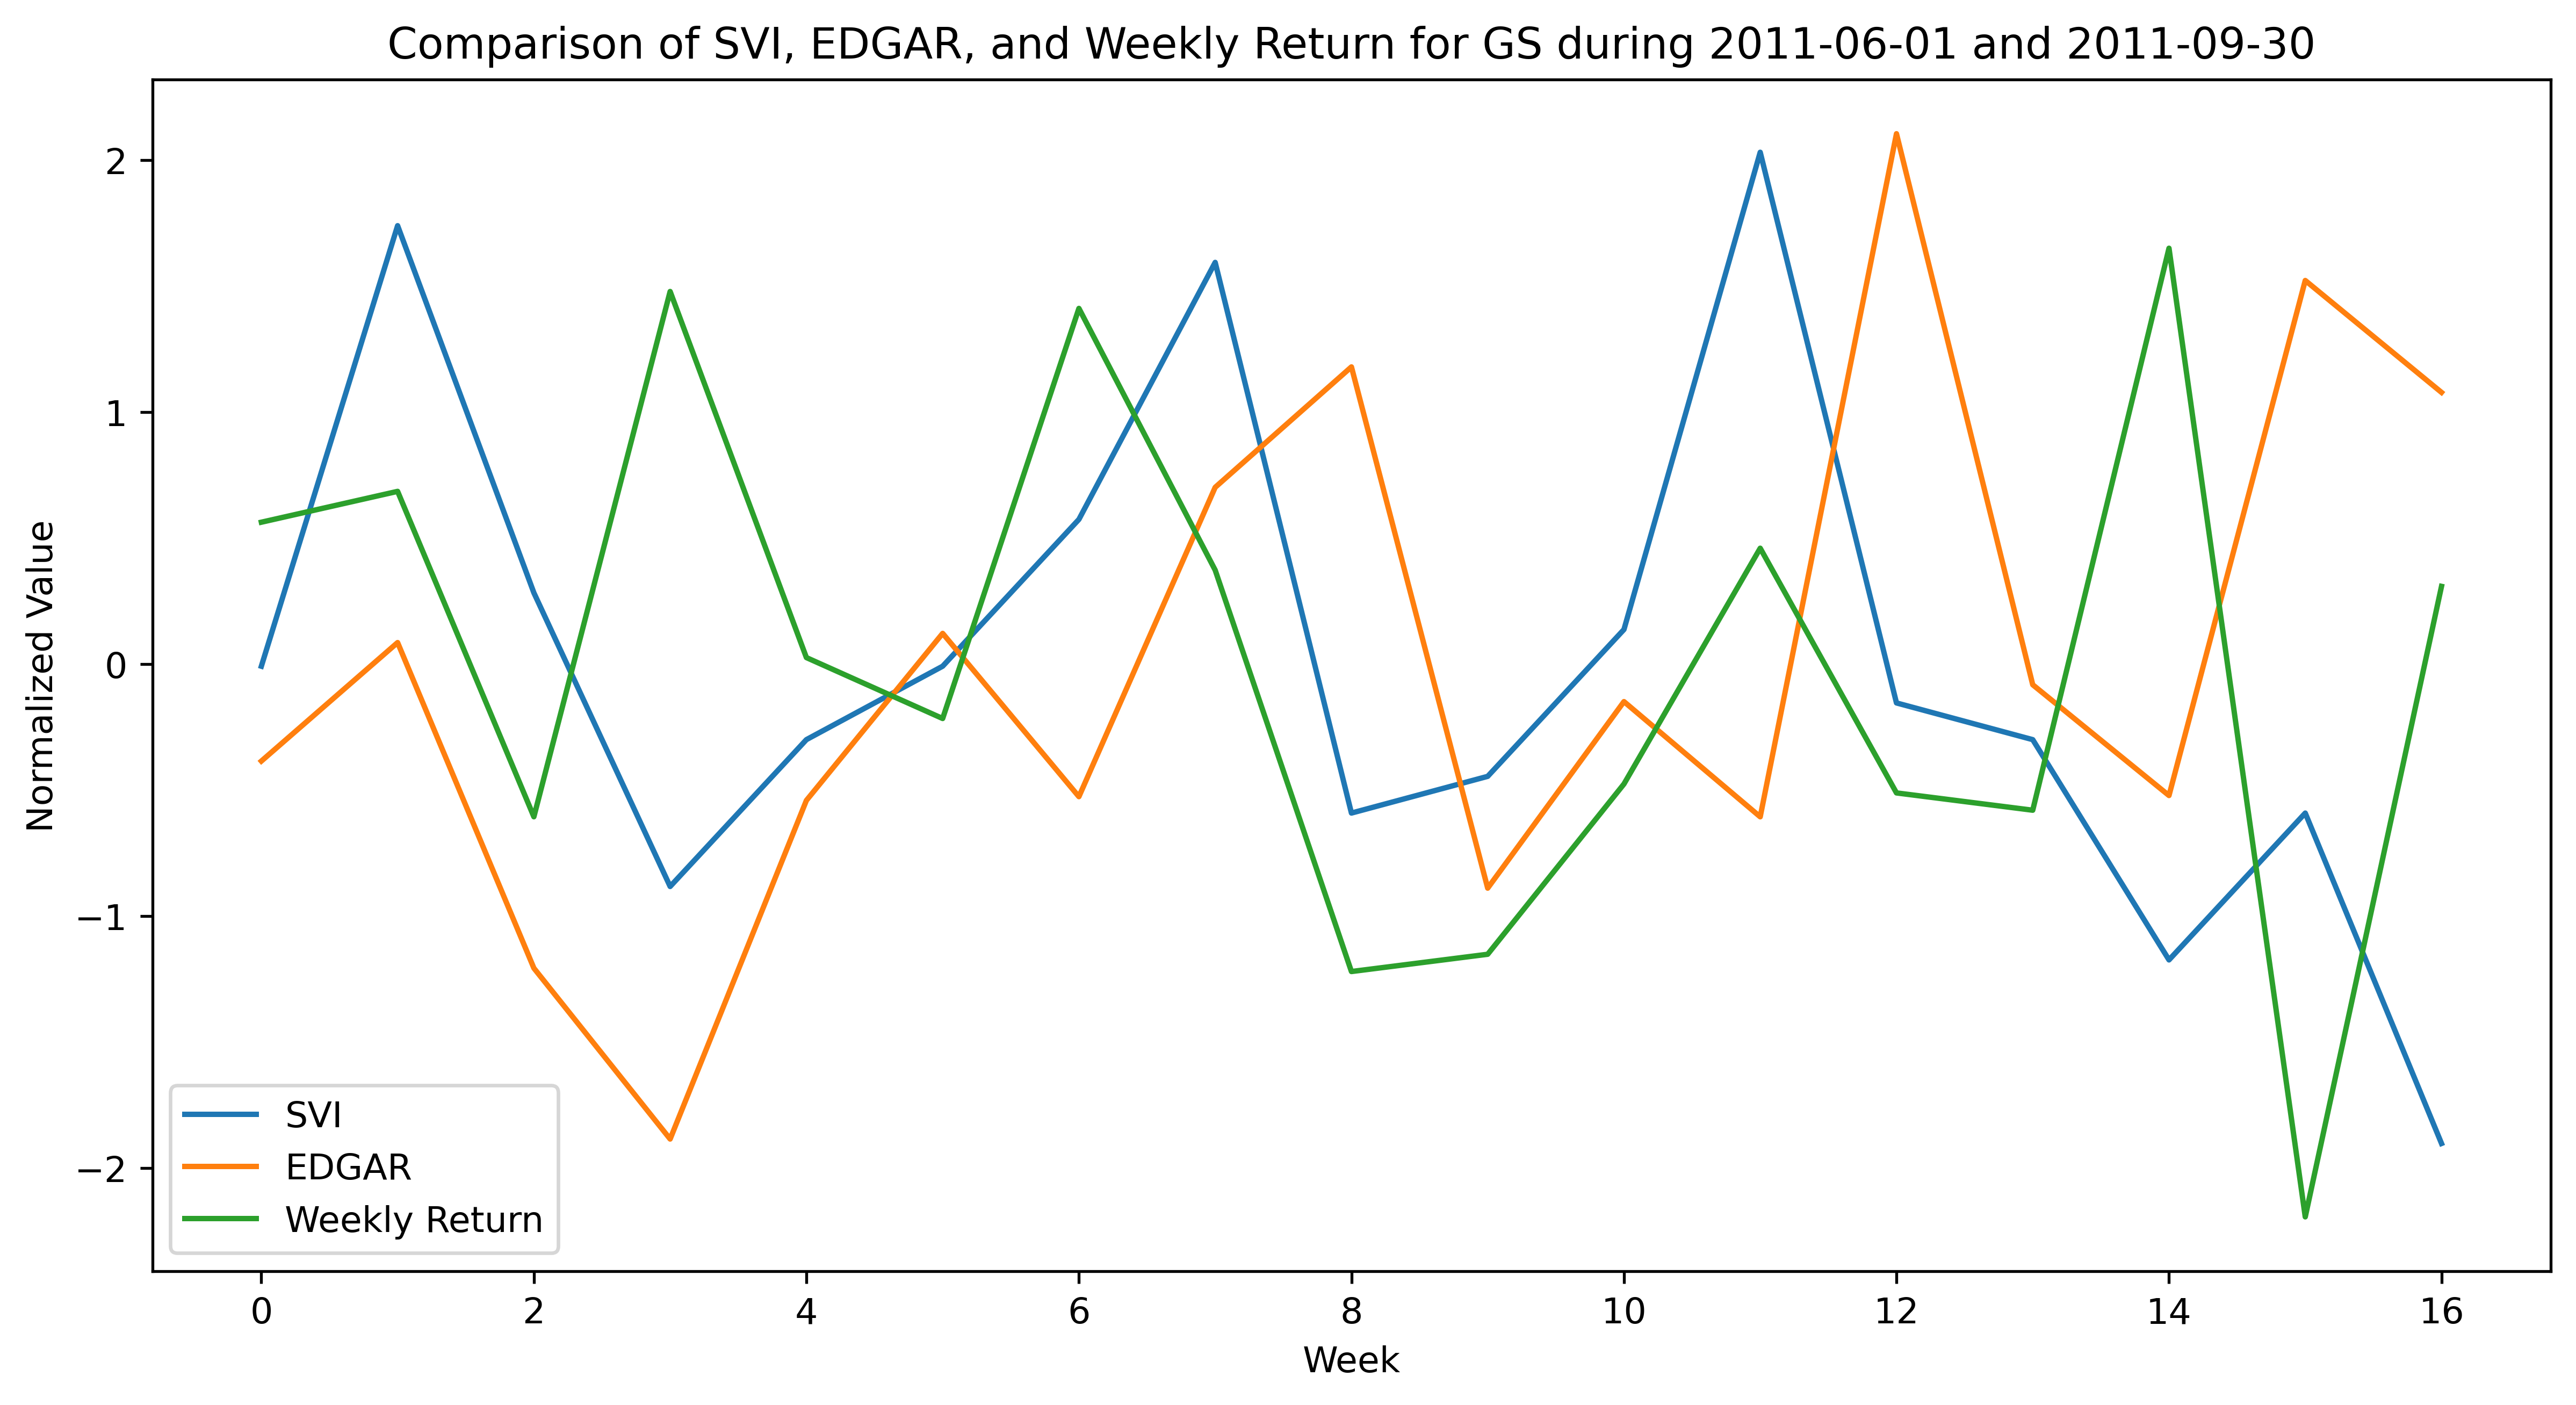

In [36]:
plot_compare('GS', '2011', '2011-06-01', '2011-09-30')

3. Consumer goods

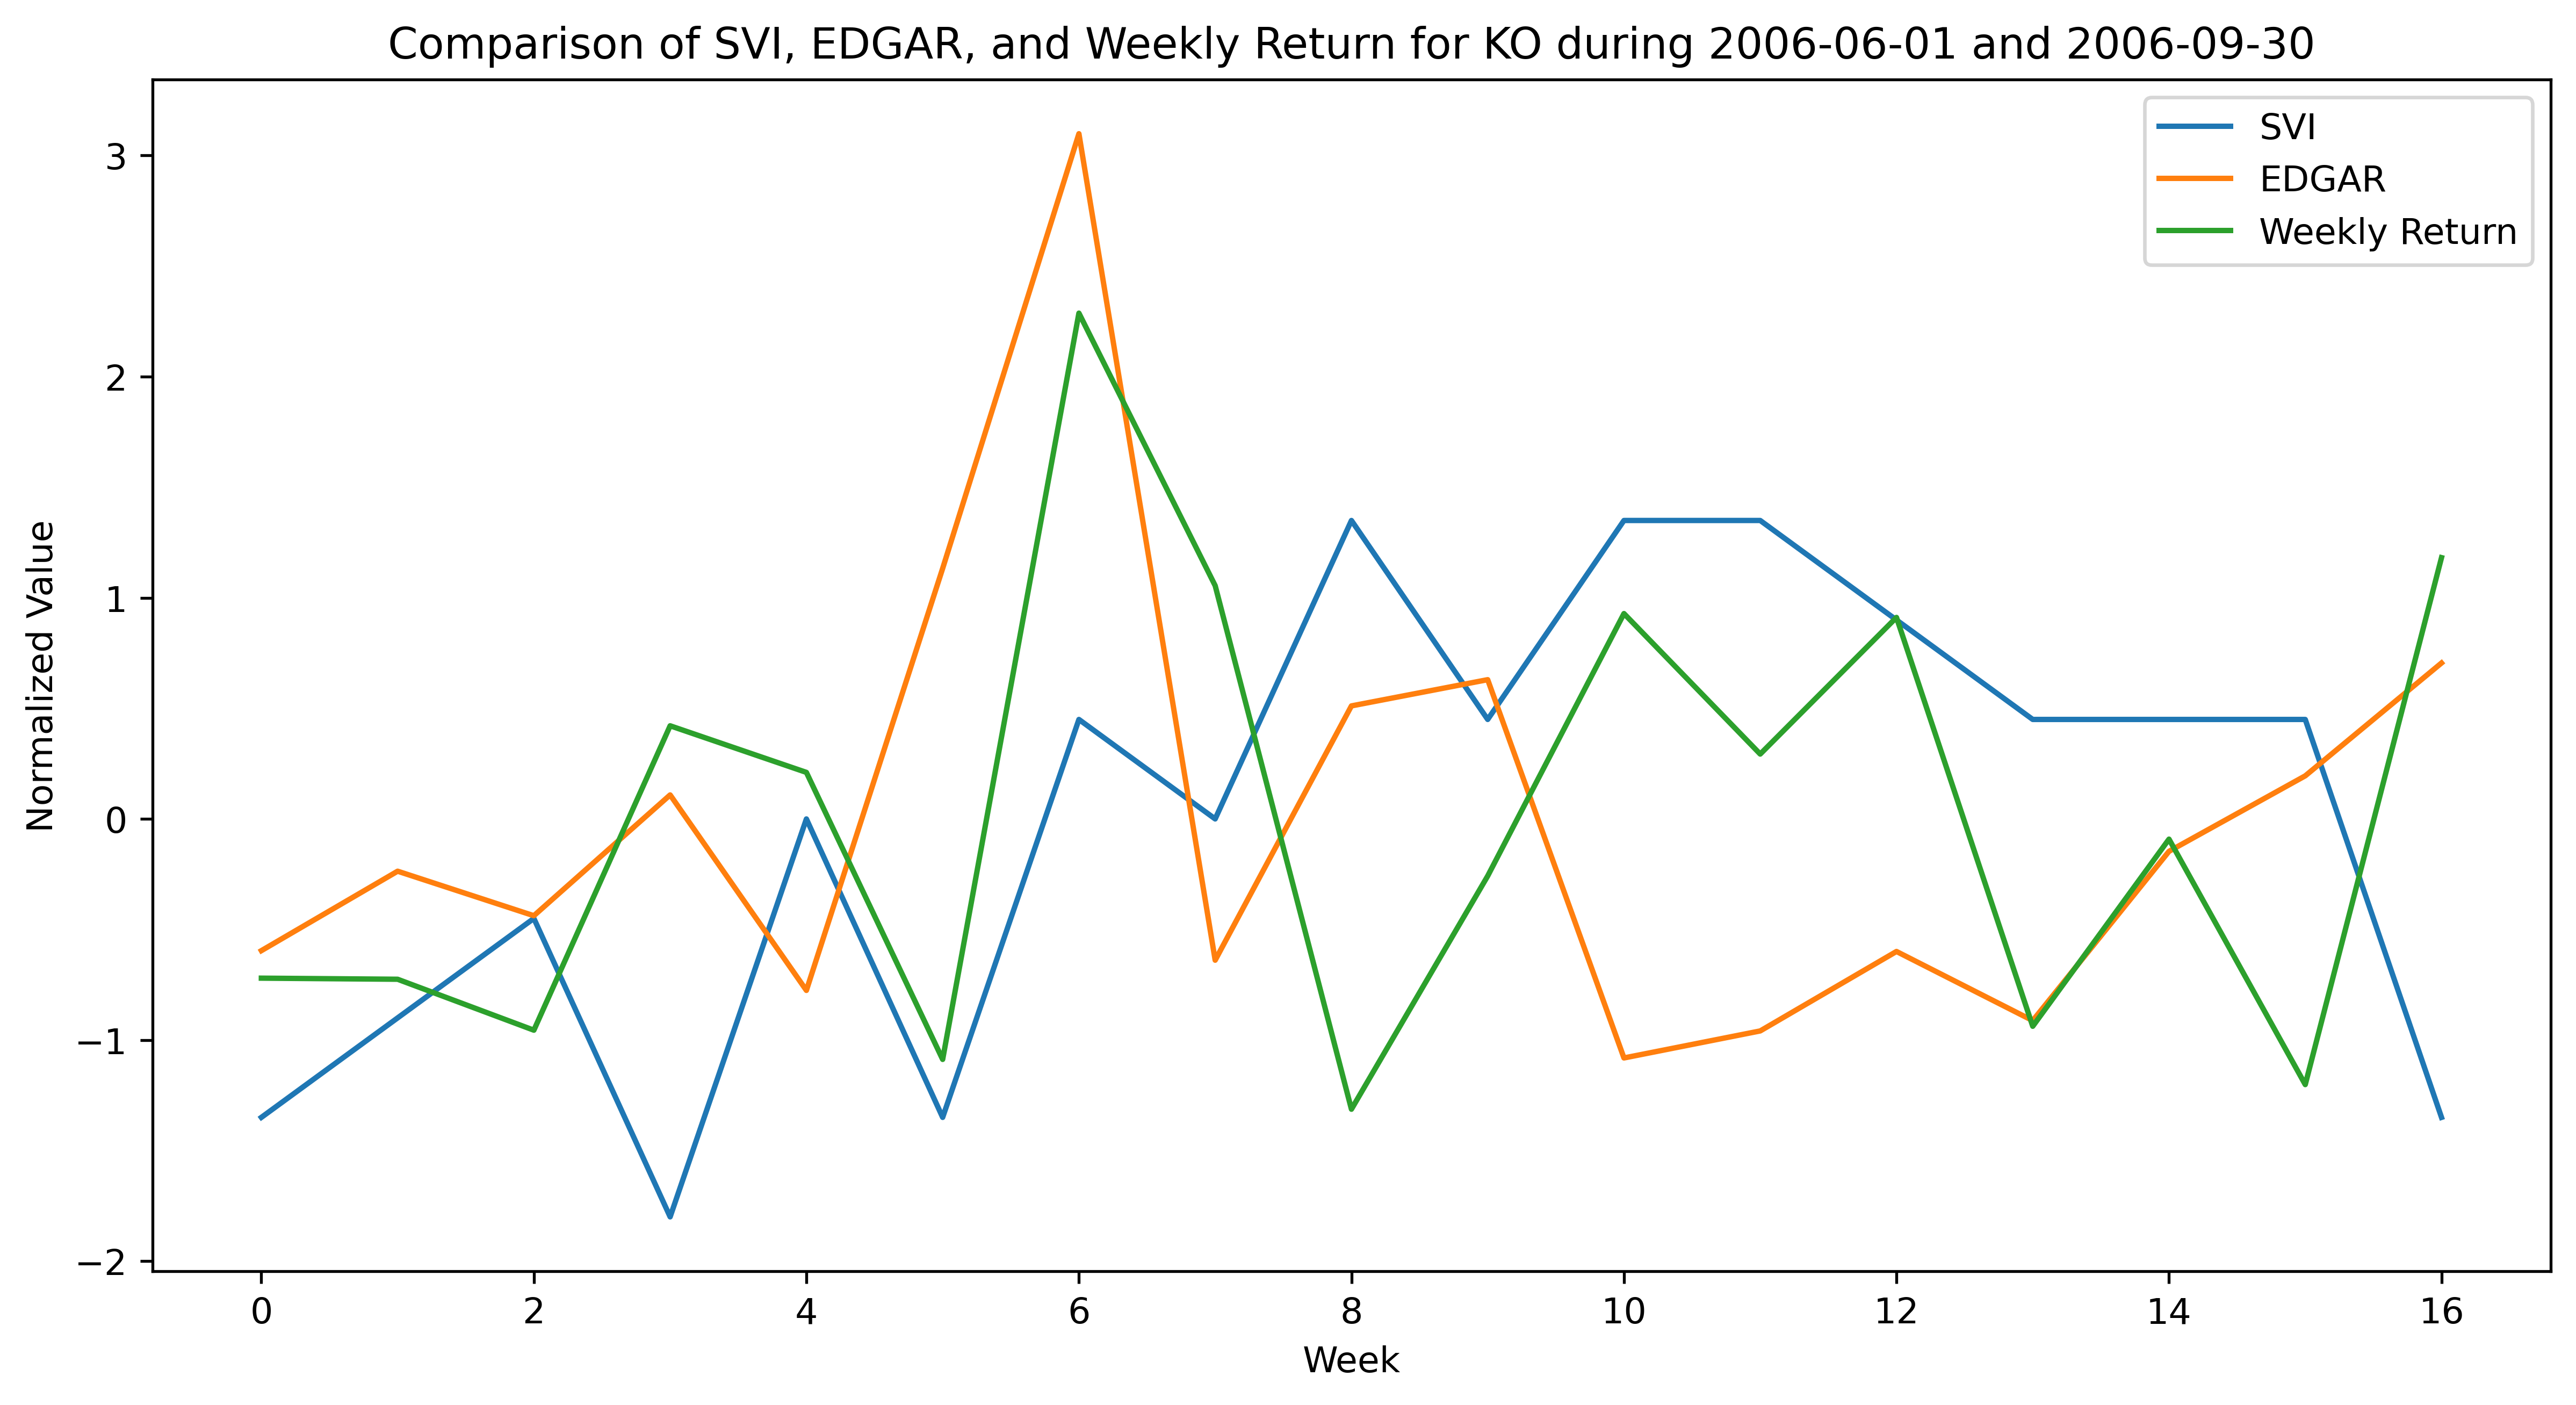

In [31]:
plot_compare('KO', '2006', '2006-06-01', '2006-09-30')

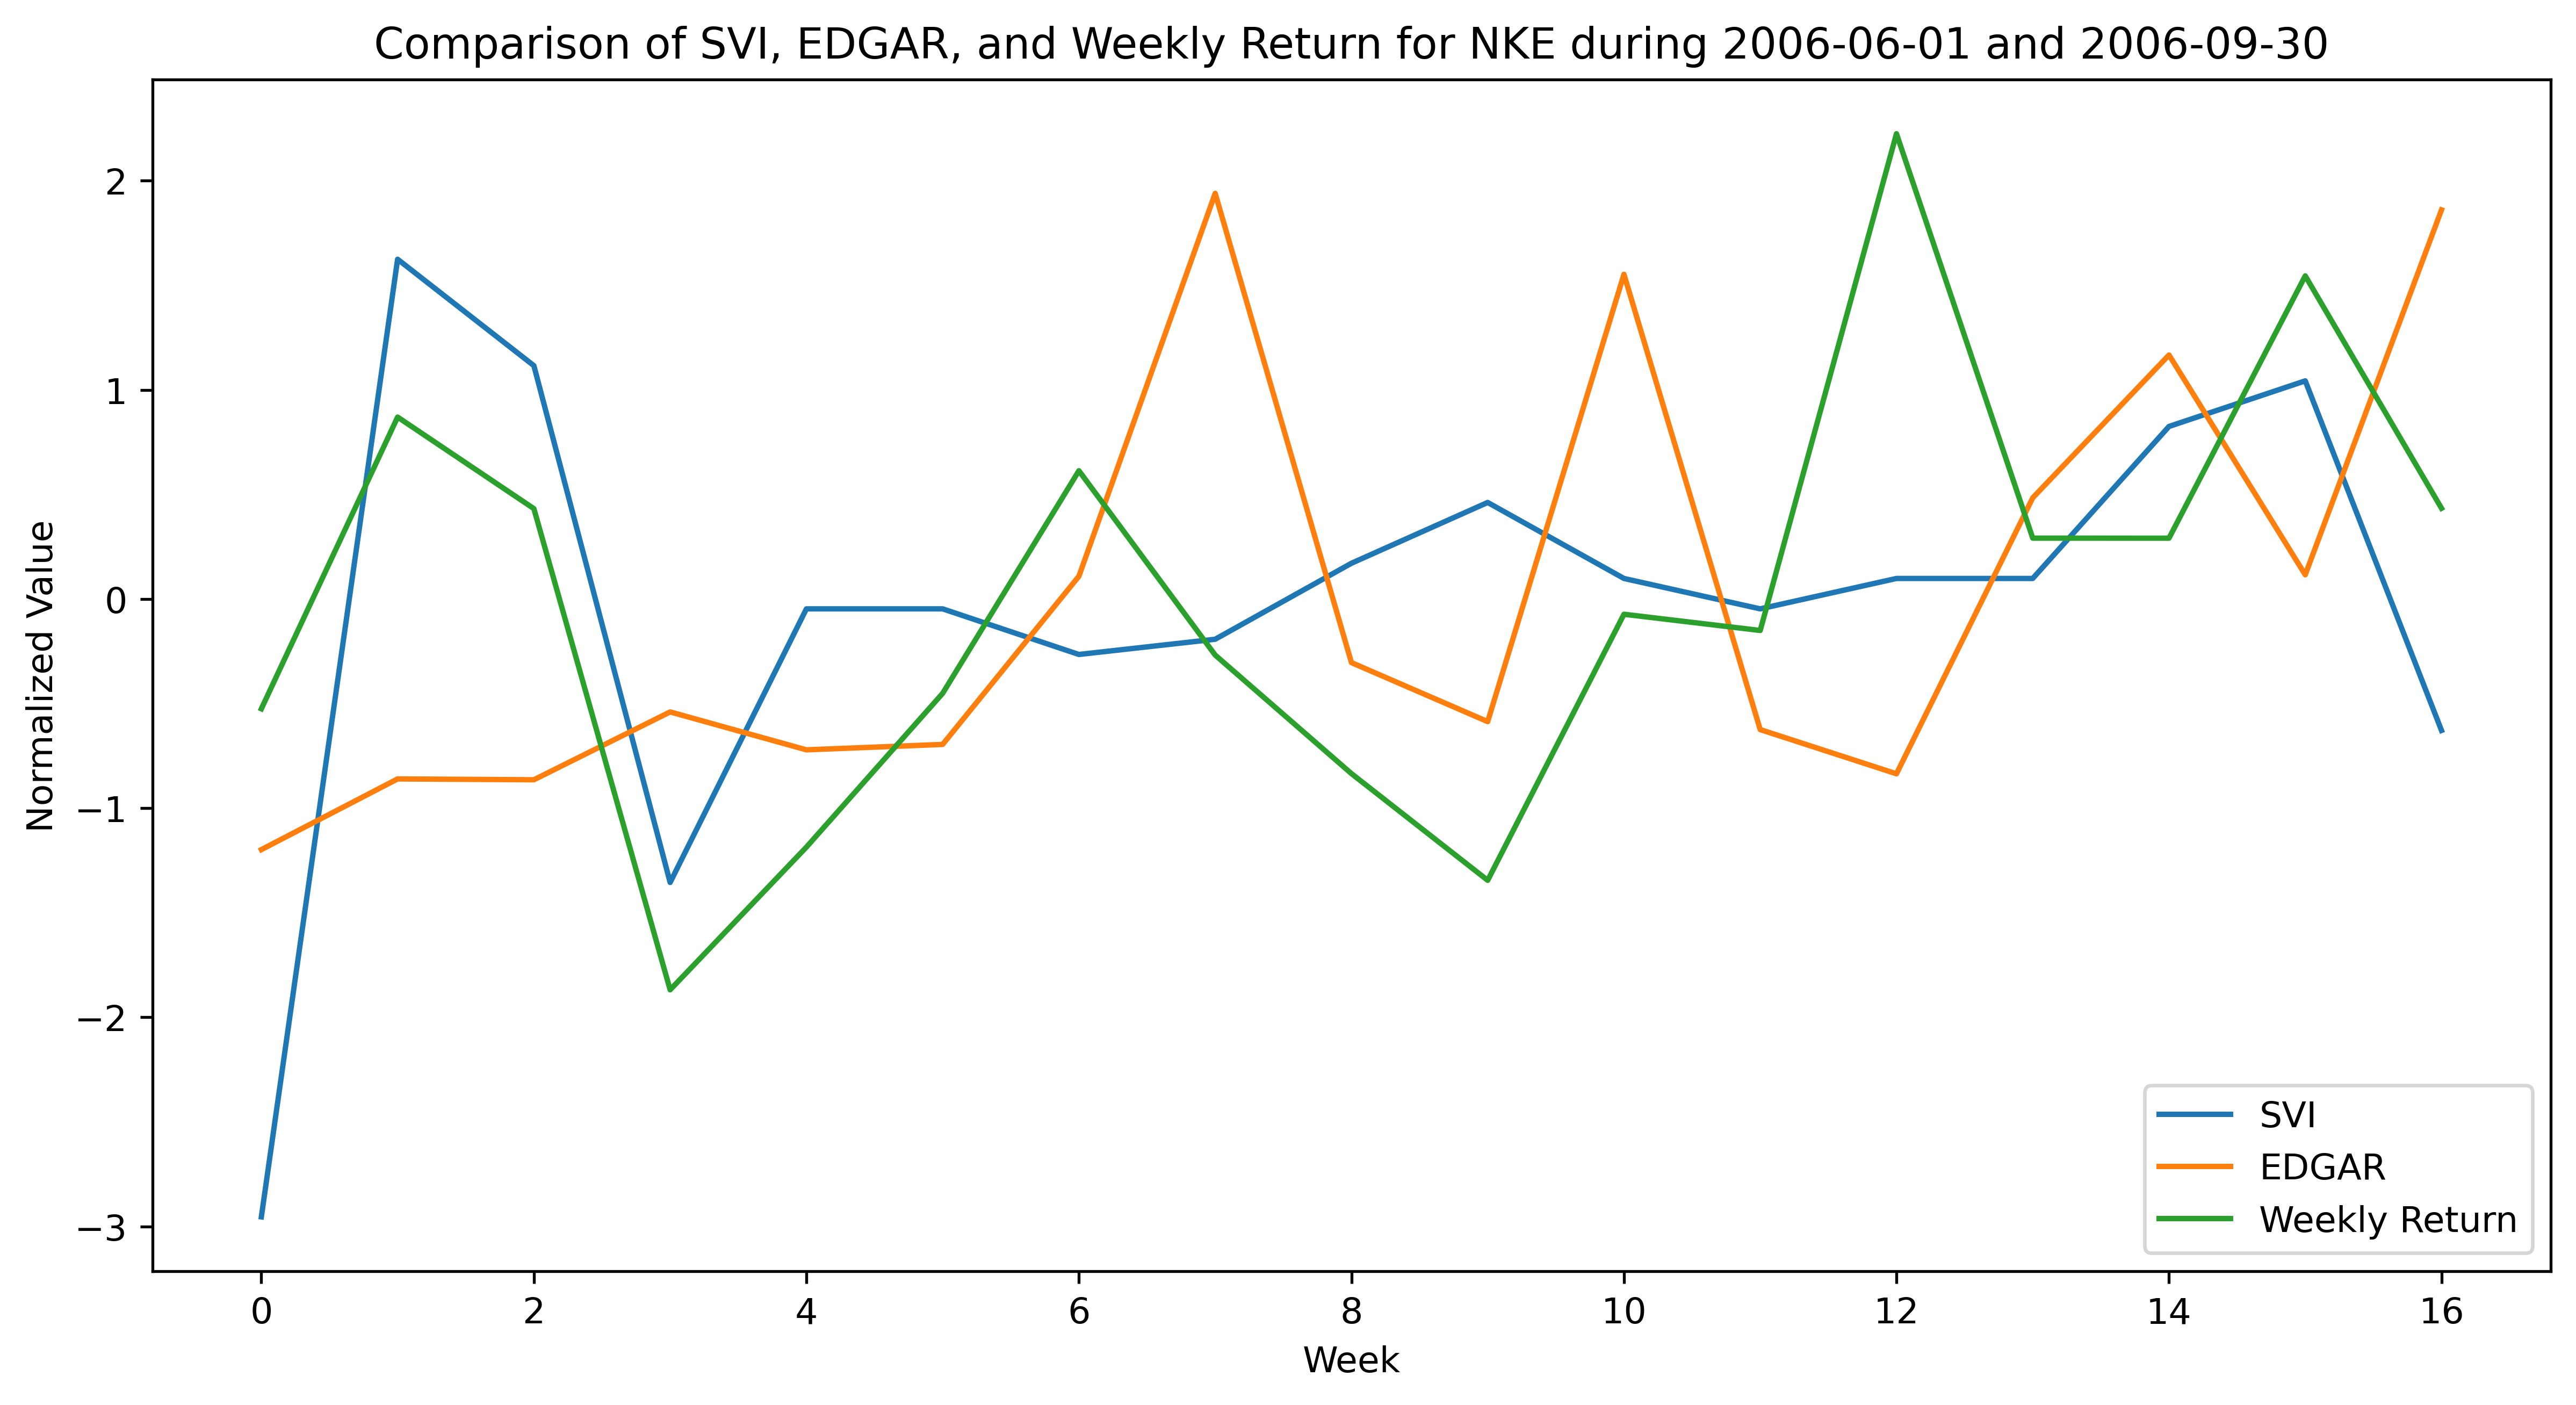

In [32]:
plot_compare('NKE', '2006', '2006-06-01', '2006-09-30')

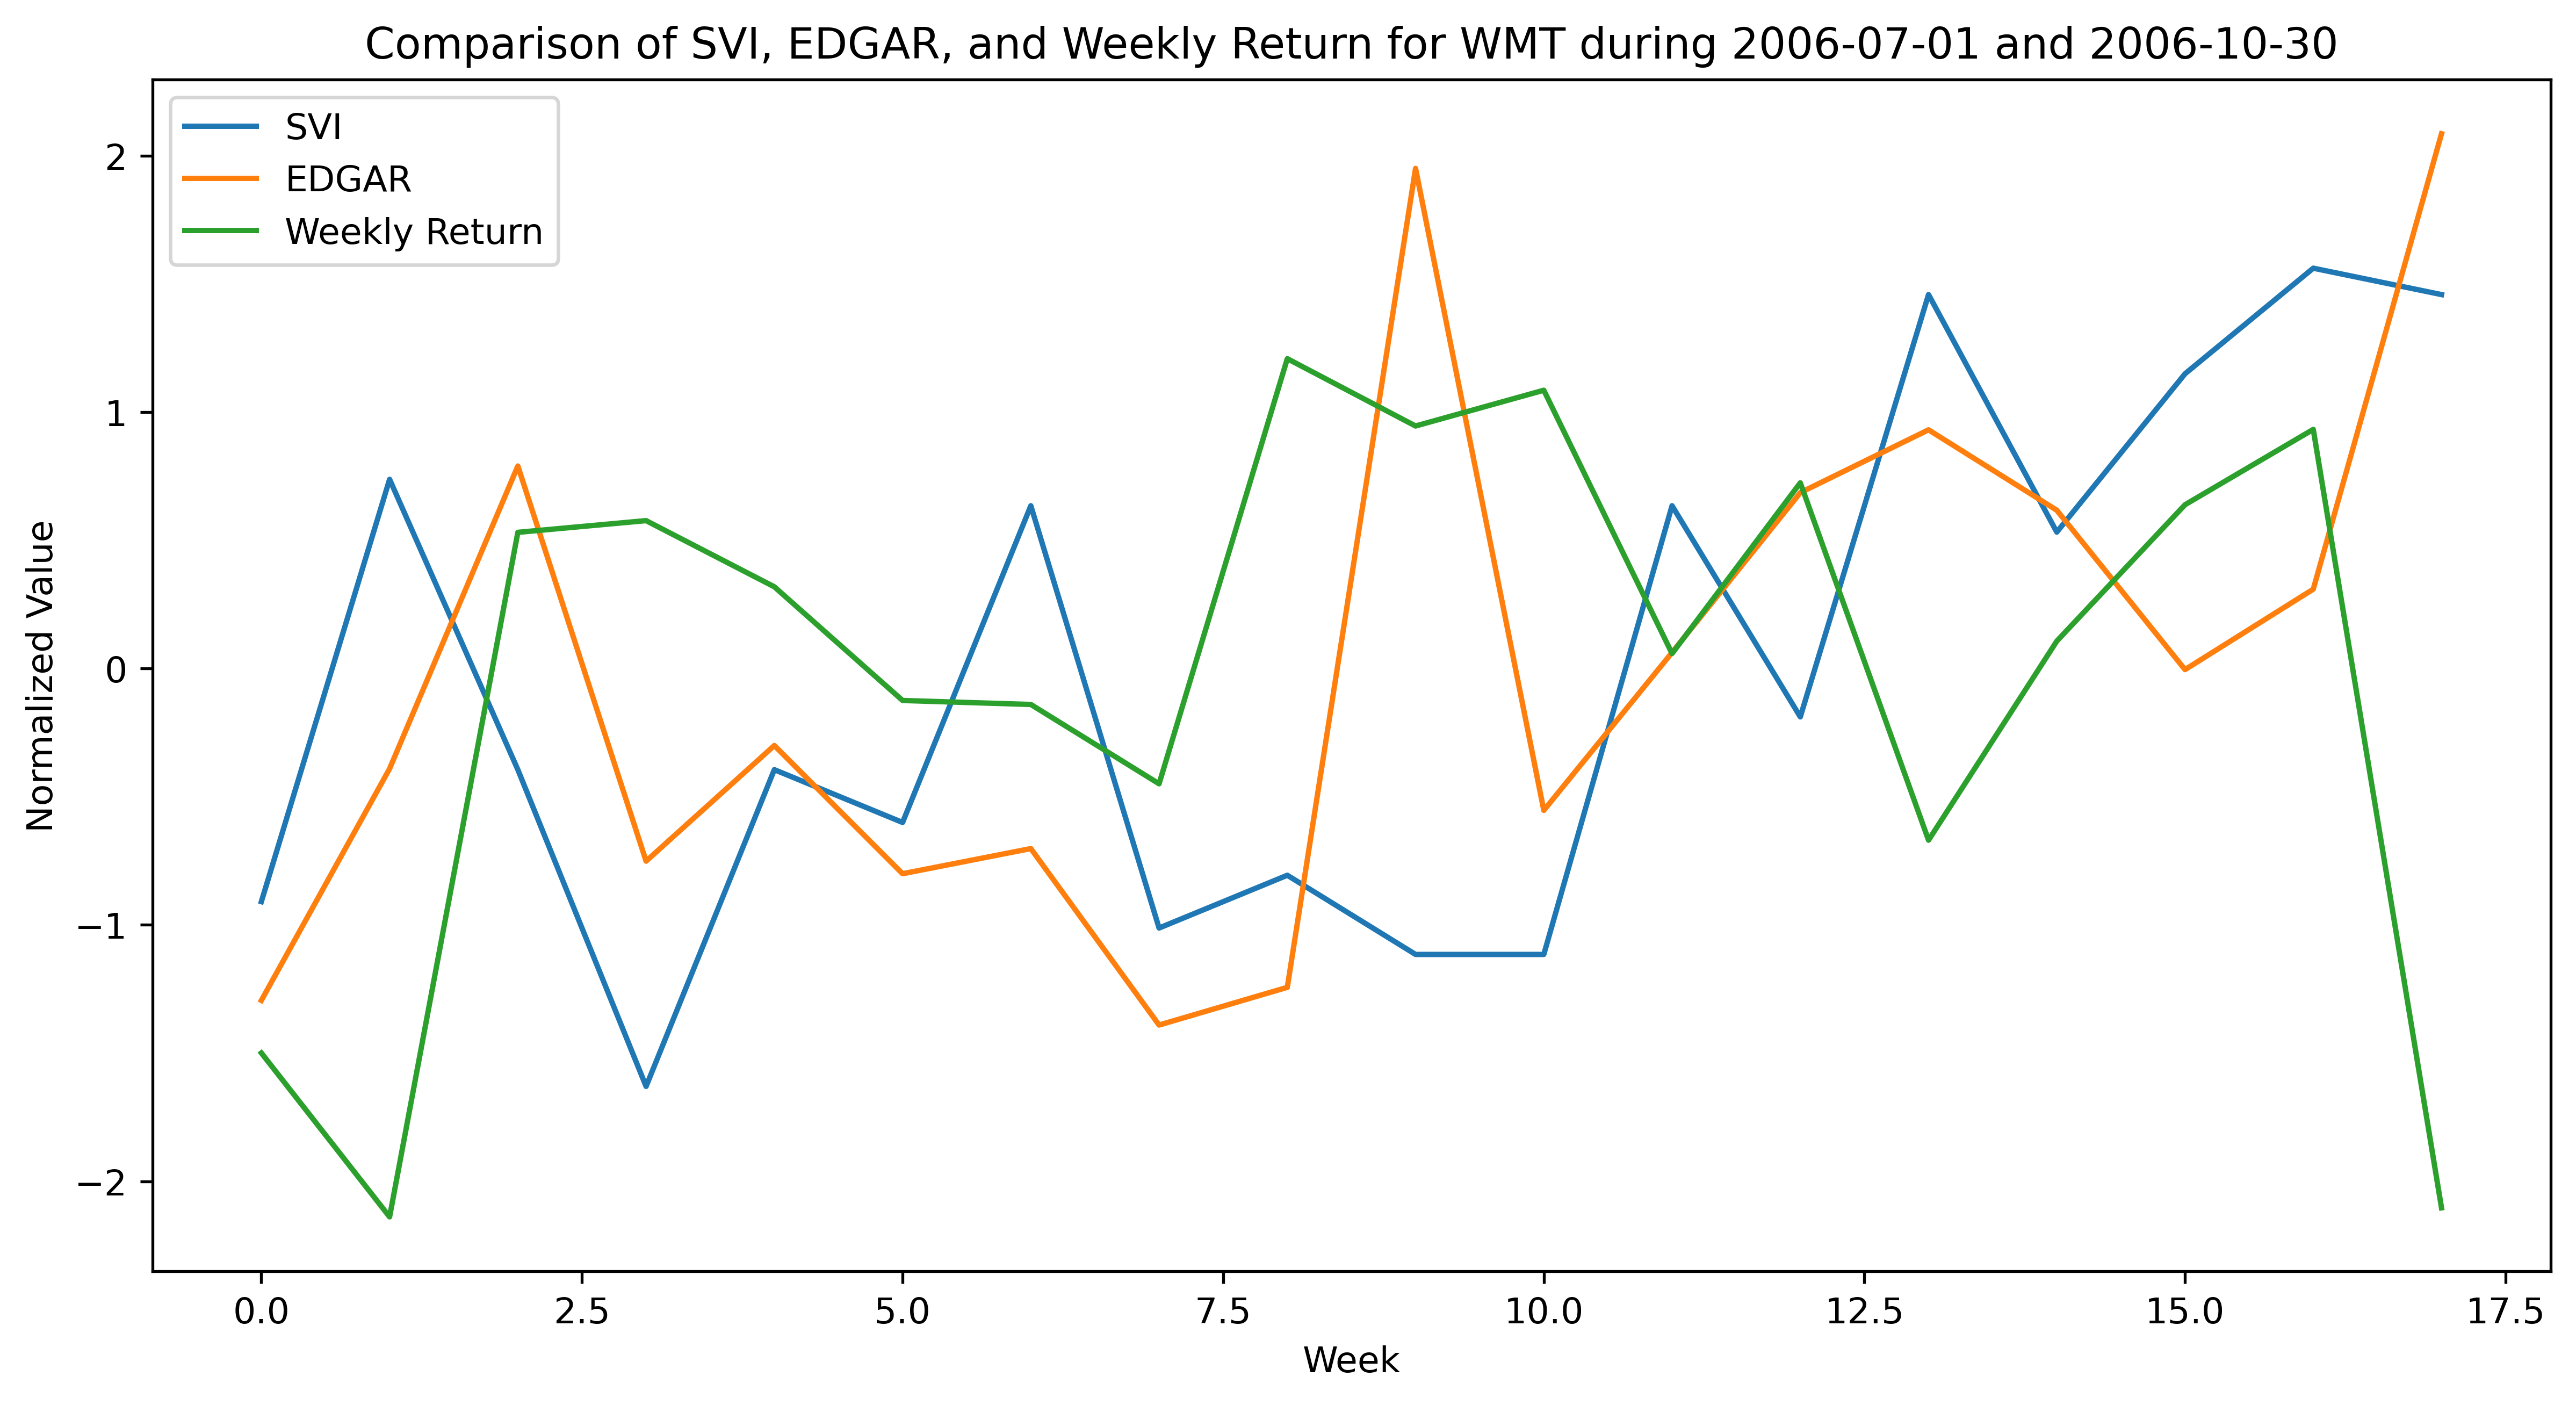

In [34]:
plot_compare('WMT', '2006', '2006-07-01', '2006-10-30')